<a href="https://colab.research.google.com/github/Andoniadou-Lab/consensus_pituitary_atlas/blob/main/Fig5_wilcoxon_markers_3_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install packages


In [ ]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 143.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.2 MB/s eta 0:00:00


# Mounting Drive onto colab

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
np.random.seed(1)
#set python hash seed to 42
!set PYTHONHASHSEED=1

df = pd.read_excel('/content/drive/MyDrive/pituitary_atlas/source_table/pituitary_atlas.xlsx')
pituitary_atlas = df.copy()
#only keep sn or sc for now
sra_ids = ["SRX8489819","SRX9528564", "ERX4978537"]
df = df[df['SRA_ID'].isin(sra_ids)]
df.reset_index(drop=True, inplace=True)
df

,GEO,SRA_ID,Name,Conditions,Normal,Background,Sorted,Author,DOI,Age,...,filtering_junk,median_cellassign_prob,most_recent_workflow,n_cells,processed_atac,passed_qc_tcc,tcc_pseudobulked,Core,Notes 1,Notes 2
0,GSM4594334,SRX8489819,FM_Pit_1-1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,8236.0,0.0,1.0,v_0.01,1.0,NaN,NaN
1,GSM4914024,SRX9528564,Pituitary_Control,normal,1,C57BL/6,0,Lopez et al. (2021),10.1126/sciadv.abe4497,10 week,...,1.0,1.0,v_0.01,4432.0,0.0,1.0,v_0.01,1.0,NaN,NaN
2,ERX4978537,ERX4978537,EXT036,GH+/+;R26iDTR/+,1,C57BL/6,0,Vennekens et al. (2021),10.1073/pnas.2100052118,9-11 weeks,...,1.0,1.0,v_0.01,4093.0,0.0,1.0,v_0.01,1.0,got fastq separately from arrayexpress,NaN


In [ ]:
import scanpy as sc
adata1 = sc.read(f"/content/drive/MyDrive/pituitary_atlas/processed/nac/{sra_ids[0]}/analysis/adata_new_assigned.h5ad")
adata2 = sc.read(f"/content/drive/MyDrive/pituitary_atlas/processed/nac/{sra_ids[1]}/analysis/adata_new_assigned.h5ad")
adata3 = sc.read(f"/content/drive/MyDrive/pituitary_atlas/processed/nac/{sra_ids[2]}/analysis/adata_new_assigned.h5ad")

/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


In [ ]:
adata1.obs["new_cell_type"].value_counts()

,count
new_cell_type,
Lactotrophs,2934
Somatotrophs,1957
Stem_cells,1033
Corticotrophs,628
Melanotrophs,436
Gonadotrophs,427
Endothelial_cells,328
Immune_cells,192
Thyrotrophs,128


In [ ]:
#remove all cells that are either Erythrocytes, Mesenchymal cells, Pituicytes, Immune_cells or Endothelial_cells
adata1 = adata1[~adata1.obs["new_cell_type"].isin(["Erythrocytes", "Mesenchymal_cells", "Pituicytes", "Immune_cells", "Endothelial_cells"])]
adata2 = adata2[~adata2.obs["new_cell_type"].isin(["Erythrocytes", "Mesenchymal_cells", "Pituicytes", "Immune_cells", "Endothelial_cells"])]
adata3 = adata3[~adata3.obs["new_cell_type"].isin(["Erythrocytes", "Mesenchymal_cells", "Pituicytes", "Immune_cells", "Endothelial_cells"])]


In [ ]:
adata1.obs["new_cell_type"]

,new_cell_type
1,Lactotrophs
2,Gonadotrophs
3,Lactotrophs
6,Melanotrophs
7,Melanotrophs
...,...
8231,Gonadotrophs
8232,Melanotrophs
8233,Corticotrophs
8234,Stem_cells


In [ ]:
import pandas as pd
import statsmodels.stats.multitest as multi
import scanpy as sc

def find_marker_genes(adata_original, dataset_name,group1=["Stem_cells"],group2=["Melanotrophs", "Corticotrophs", "Somatotrophs", "Lactotrophs", "Thyrotrophs", "Gonadotrophs"]):
    """
    Perform Wilcoxon rank-sum test to find marker genes for each cell cluster using scanpy's optimized function.

    Parameters:
    adata : AnnData
        Annotated data matrix.
    dataset_name : str
        Name of the dataset for tracking.

    Returns:
    pd.DataFrame
        DataFrame containing marker gene statistics with columns: gene, dataset, cell_type, sig, direction.
    """
    adata = adata_original.copy()
    # Ensure the clustering information is available
    if 'new_cell_type' not in adata.obs.columns:
        raise ValueError("Column 'new_cell_type' not found in adata.obs")
    #norm and log1p
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    # Find marker genes
    # Run scanpy's Wilcoxon test
    adata.obs["groups"] = adata.obs["new_cell_type"].isin(group1).astype(str)
    adata.obs["groups"] = adata.obs["groups"].replace({"True": "group1", "False": "group2"})


    sc.tl.rank_genes_groups(adata, groupby="groups", method="wilcoxon")

    # Extract results
    results = []
    groups = adata.obs["groups"].unique()

    for cluster in groups:
        genes = adata.uns["rank_genes_groups"]["names"][cluster]
        pvals = adata.uns["rank_genes_groups"]["pvals"][cluster]
        log2fc = adata.uns["rank_genes_groups"]["logfoldchanges"][cluster]
        #do fdr on pvals

        reject, pvals_corrected, _, _ = multi.multipletests(pvals, alpha=0.05, method='fdr_bh')
        pvals = pvals_corrected

        for gene, pval, lfc in zip(genes, pvals, log2fc):
            results.append({
                "gene": gene,
                "dataset": dataset_name,
                "cell_type": cluster,
                "sig": pval,
                "direction": "pos" if lfc > 0 else "neg"
            })

    # Convert to DataFrame
    return pd.DataFrame(results)





In [ ]:
groupings = {
    "grouping_1": [["Stem_cells"], ["Melanotrophs", "Corticotrophs", "Somatotrophs", "Lactotrophs", "Thyrotrophs", "Gonadotrophs"]],
    "grouping_2": [["Gonadotrophs"], ["Melanotrophs", "Corticotrophs", "Somatotrophs", "Lactotrophs", "Thyrotrophs", "Stem_cells"]],
    "grouping_3": [["Melanotrophs", "Corticotrophs"], ["Somatotrophs", "Lactotrophs", "Thyrotrophs", "Gonadotrophs", "Stem_cells"]],
    "grouping_4": [["Melanotrophs"],["Corticotrophs"]],
    "grouping_5": [["Somatotrophs", "Lactotrophs", "Thyrotrophs"], ["Gonadotrophs", "Stem_cells", "Melanotrophs", "Corticotrophs"]],
    "grouping_6": [["Lactotrophs"], ["Somatotrophs", "Thyrotrophs"]],
    "grouping_7": [["Somatotrophs"], ["Lactotrophs", "Thyrotrophs"]],
    "grouping_8": [["Thyrotrophs"], ["Lactotrophs", "Somatotrophs"]]
}

In [ ]:
#total number of genes occurring in adata1,2,3
adata1_genes = set(adata1.var_names)
adata2_genes = set(adata2.var_names)
adata3_genes = set(adata3.var_names)
all_genes = adata1_genes.union(adata2_genes).union(adata3_genes)
len(all_genes)

28867

In [ ]:
adata1_marker_genes = find_marker_genes(adata1, sra_ids[0])
adata2_marker_genes = find_marker_genes(adata2, sra_ids[1])
adata3_marker_genes = find_marker_genes(adata3, sra_ids[2])
#concat
marker_genes = pd.concat([adata1_marker_genes, adata2_marker_genes, adata3_marker_genes])
marker_genes

,gene,dataset,cell_type,sig,direction
0,Nalf1,SRX8489819,group2,0.000000e+00,pos
1,Nrxn1,SRX8489819,group2,0.000000e+00,pos
2,Ptprn2,SRX8489819,group2,0.000000e+00,pos
3,Pcsk1n,SRX8489819,group2,0.000000e+00,pos
4,Elapor1,SRX8489819,group2,0.000000e+00,pos
...,...,...,...,...,...
52005,Dlk1,ERX4978537,group1,7.140138e-21,neg
52006,Nalf1,ERX4978537,group1,3.022992e-21,neg
52007,Pcsk1n,ERX4978537,group1,9.767853e-22,neg
52008,Meg3,ERX4978537,group1,5.588769e-22,neg


In [ ]:
stem_cell_markers = marker_genes[marker_genes["cell_type"] == "group1"]
#find cols where gene is Sox2
#keep only where its pos
#show dataset SRX8489819

sc0= stem_cell_markers[stem_cell_markers["dataset"] == sra_ids[0]]
#how many <0.05
sc0[sc0["sig"] < 0.05]

,gene,dataset,cell_type,sig,direction
27685,Tmsb4x,SRX8489819,group1,0.0,pos
27686,Rbpms,SRX8489819,group1,0.0,pos
27687,Actb,SRX8489819,group1,0.0,pos
27688,Ptma,SRX8489819,group1,0.0,pos
27689,Ifitm3,SRX8489819,group1,0.0,pos
...,...,...,...,...,...
55365,Elapor1,SRX8489819,group1,0.0,neg
55366,Pcsk1n,SRX8489819,group1,0.0,neg
55367,Ptprn2,SRX8489819,group1,0.0,neg
55368,Nrxn1,SRX8489819,group1,0.0,neg


In [ ]:
#load /content/grouping_lineage_markers.csv
grouping_lineage_markers_df = pd.read_csv("/content/drive/MyDrive/pituitary_atlas/Unstructured/grouping_lineage_markers.csv") #keep where grouping is grouping_1 and direction is up

grouping_lineage_markers_df = grouping_lineage_markers_df[(grouping_lineage_markers_df["grouping"] == "grouping_1") & (grouping_lineage_markers_df["direction"] == "up")]
grouping_lineage_markers = grouping_lineage_markers_df["gene"].values
#reset
grouping_lineage_markers_df.reset_index(drop=True, inplace=True)
grouping_lineage_markers_df

,gene,direction,log2fc,pvalue,AveExpr,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF
0,Cdh26,up,5.792684,8.099647e-140,0.793909,5.692443,5.215685e-138,0.793909,grouping_1,0
1,Trpv4,up,5.370721,2.301052e-139,0.822954,4.712950,1.286797e-115,0.822954,grouping_1,0
2,Cpxm2,up,6.127143,9.084539e-135,1.719331,5.856765,1.377529e-127,1.719331,grouping_1,0
3,Gm28380,up,4.963061,3.804892e-131,-0.194827,5.118000,5.060416e-140,-0.194827,grouping_1,0
4,Alox12e,up,5.770923,1.154978e-128,0.224201,5.774790,6.109327e-131,0.224201,grouping_1,0
...,...,...,...,...,...,...,...,...,...,...
2212,Trmt9b,up,0.516195,4.160623e-02,2.236405,1.986859,5.923948e-25,2.236405,grouping_1,0
2213,Ildr2,up,0.548540,4.334772e-02,2.560754,3.114830,4.666814e-43,2.560754,grouping_1,0
2214,Ano10,up,0.436721,4.501176e-02,4.522658,0.702094,3.228244e-04,4.522658,grouping_1,0
2215,Pwwp2b,up,0.436120,4.436683e-02,2.696787,0.923010,1.756659e-06,2.696787,grouping_1,0


In [ ]:
#load coef /content/coef.csv
coef = pd.read_csv("/content/drive/MyDrive/pituitary_atlas/Unstructured/coef.csv")
#rename Unnamed: 0 to gene
coef.rename(columns={'Unnamed: 0': 'gene', "assignmentsStem_cells":"AveExpr" }, inplace=True)
gene_averages = coef[["gene","AveExpr"]]
#remove AveExpr from grouping_lineage_markers_df
grouping_lineage_markers_df = grouping_lineage_markers_df.drop(columns=["AveExpr"])
grouping_lineage_markers_df = grouping_lineage_markers_df.merge(gene_averages, on="gene", how="left")
grouping_lineage_markers_df

,gene,direction,log2fc,pvalue,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,AveExpr
0,Cdh26,up,5.792684,8.099647e-140,5.692443,5.215685e-138,0.793909,grouping_1,0,6.661444
1,Trpv4,up,5.370721,2.301052e-139,4.712950,1.286797e-115,0.822954,grouping_1,0,5.358764
2,Cpxm2,up,6.127143,9.084539e-135,5.856765,1.377529e-127,1.719331,grouping_1,0,7.512087
3,Gm28380,up,4.963061,3.804892e-131,5.118000,5.060416e-140,-0.194827,grouping_1,0,5.512692
4,Alox12e,up,5.770923,1.154978e-128,5.774790,6.109327e-131,0.224201,grouping_1,0,6.357567
...,...,...,...,...,...,...,...,...,...,...
2212,Trmt9b,up,0.516195,4.160623e-02,1.986859,5.923948e-25,2.236405,grouping_1,0,4.490580
2213,Ildr2,up,0.548540,4.334772e-02,3.114830,4.666814e-43,2.560754,grouping_1,0,5.608709
2214,Ano10,up,0.436721,4.501176e-02,0.702094,3.228244e-04,4.522658,grouping_1,0,5.064155
2215,Pwwp2b,up,0.436120,4.436683e-02,0.923010,1.756659e-06,2.696787,grouping_1,0,3.432124


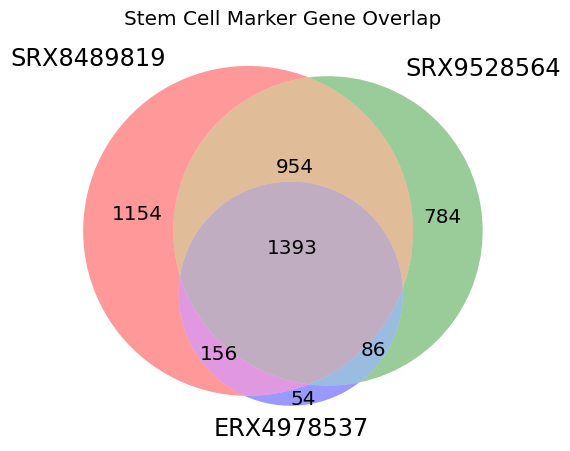

Number of genes with conflicting directionality: 0
Genes with conflicting directionality:
[]


In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd

# Filter for "Stem_cells"
stem_cell_markers = marker_genes[marker_genes["cell_type"] == "group1"]
#keep where sig is <0.05
stem_cell_markers = stem_cell_markers[stem_cell_markers["sig"] < 0.05]

#keep only. direction pos
stem_cell_markers = stem_cell_markers[stem_cell_markers["direction"] == "pos"]

# Group by dataset and direction
grouped = stem_cell_markers.groupby(["dataset", "direction"])["gene"].apply(set).reset_index()

# Create sets for each dataset (only keeping consistent directionality)
adata1_genes = grouped[(grouped["dataset"] == sra_ids[0])]["gene"].values
adata2_genes = grouped[(grouped["dataset"] == sra_ids[1])]["gene"].values
adata3_genes = grouped[(grouped["dataset"] == sra_ids[2])]["gene"].values

# Convert to sets (handling cases where datasets may be missing values)
adata1_genes = adata1_genes[0] if len(adata1_genes) > 0 else set()
adata2_genes = adata2_genes[0] if len(adata2_genes) > 0 else set()
adata3_genes = adata3_genes[0] if len(adata3_genes) > 0 else set()

# Make the Venn diagram
plt.figure(figsize=(6, 6))
venn3([adata1_genes, adata2_genes, adata3_genes], set_labels=sra_ids)
plt.title("Stem Cell Marker Gene Overlap")
plt.show()

# Identify conflicting directionality
conflicting_genes = stem_cell_markers.groupby("gene")["direction"].nunique()
conflicting_genes = conflicting_genes[conflicting_genes > 1]

# Print results
print(f"Number of genes with conflicting directionality: {len(conflicting_genes)}")
print("Genes with conflicting directionality:")
print(conflicting_genes.index.tolist())


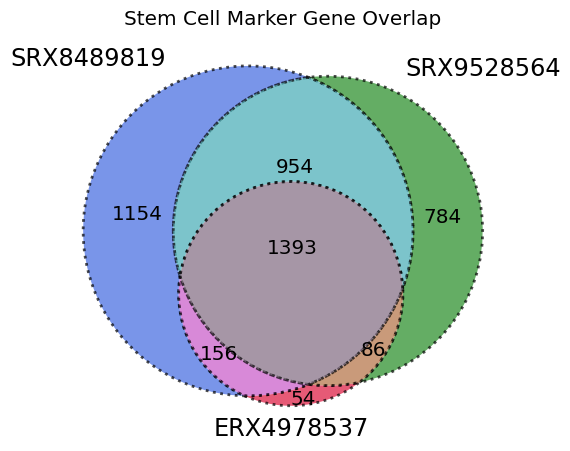

Number of genes with conflicting directionality: 0
Genes with conflicting directionality:
[]


/usr/local/lib/python3.12/dist-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


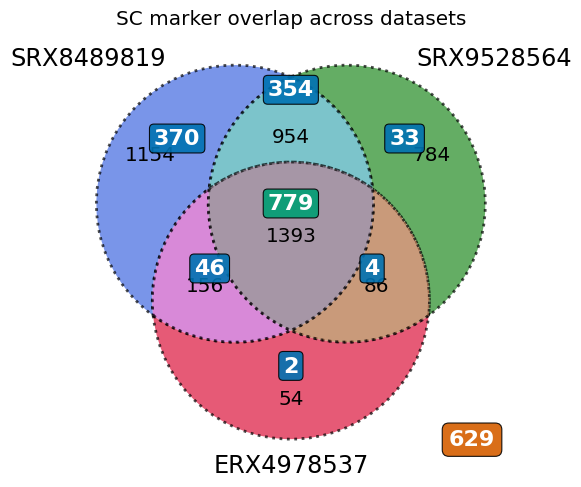


Number of Grouping 1 up-regulated genes by region:
In Set 1: 370
In Set 2: 33
In Set 3: 2
In Set 1, Set 2: 354
In Set 1, Set 3: 46
In Set 2, Set 3: 4
In Set 1, Set 2, Set 3: 779
Outside all sets: 629
Total Grouping 1 up-regulated genes: 2217


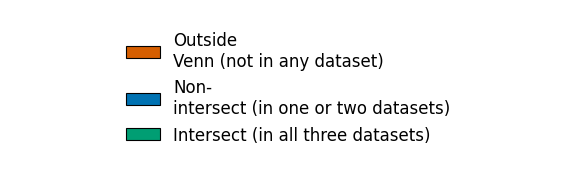

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_unweighted
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Filter for "Stem_cells"
stem_cell_markers = marker_genes[marker_genes["cell_type"] == "group1"]
#keep where sig is <0.05
stem_cell_markers = stem_cell_markers[stem_cell_markers["sig"] < 0.05]

#keep only. direction pos
stem_cell_markers = stem_cell_markers[stem_cell_markers["direction"] == "pos"]

# Group by dataset and direction
grouped = stem_cell_markers.groupby(["dataset", "direction"])["gene"].apply(set).reset_index()

# Create sets for each dataset (only keeping consistent directionality)
adata1_genes = grouped[(grouped["dataset"] == sra_ids[0])]["gene"].values
adata2_genes = grouped[(grouped["dataset"] == sra_ids[1])]["gene"].values
adata3_genes = grouped[(grouped["dataset"] == sra_ids[2])]["gene"].values

# Convert to sets (handling cases where datasets may be missing values)
adata1_genes = adata1_genes[0] if len(adata1_genes) > 0 else set()
adata2_genes = adata2_genes[0] if len(adata2_genes) > 0 else set()
adata3_genes = adata3_genes[0] if len(adata3_genes) > 0 else set()

# Load grouping_lineage_markers
grouping_lineage_markers = pd.read_csv("/content/drive/MyDrive/pituitary_atlas/Unstructured/grouping_lineage_markers.csv")
# Keep where grouping is grouping_1 and direction is up
grouping_lineage_markers = grouping_lineage_markers[(grouping_lineage_markers["grouping"] == "grouping_1") &
                                                   (grouping_lineage_markers["direction"] == "up")]
target_genes = set(grouping_lineage_markers["gene"].values)

# Make the Venn diagram
plt.figure(figsize=(6, 6))
v = venn3([adata1_genes, adata2_genes, adata3_genes], set_labels=sra_ids,
          set_colors=('royalblue', 'forestgreen', 'crimson'),
          alpha=0.7)

# Add dotted outlines to each circle
for patch in v.patches:
    patch.set_edgecolor('black')
    patch.set_linestyle('dotted')
    patch.set_linewidth(2)

plt.title("Stem Cell Marker Gene Overlap")
plt.show()

# Identify conflicting directionality
conflicting_genes = stem_cell_markers.groupby("gene")["direction"].nunique()
conflicting_genes = conflicting_genes[conflicting_genes > 1]

# Print results
print(f"Number of genes with conflicting directionality: {len(conflicting_genes)}")
print("Genes with conflicting directionality:")
print(conflicting_genes.index.tolist())

# Now create a second plot for the annotations - using unweighted version
plt.figure(figsize=(6, 6))
v = venn3_unweighted([adata1_genes, adata2_genes, adata3_genes], set_labels=sra_ids,
                    set_colors=('royalblue', 'forestgreen', 'crimson'),
                    alpha=0.7)

# Add dotted outlines to each circle
for patch in v.patches:
    patch.set_edgecolor('black')
    patch.set_linestyle('dotted')
    patch.set_linewidth(2)

plt.title("SC marker overlap across datasets")

# Define regions for annotation placement
# Each region in the Venn diagram gets assigned coordinates for text placement
regions = {
    '100': (-0.35, 0.3),    # Only in set 1
    '010': (0.35, 0.3),     # Only in set 2
    '001': (0, -0.4),       # Only in set 3
    '110': (0, 0.45),       # In sets 1 & 2
    '101': (-0.25, -0.1),   # In sets 1 & 3
    '011': (0.25, -0.1),    # In sets 2 & 3
    '111': (0, 0.1)         # In all three sets
}

# Define colors to match boxplot
region_colors = {
    '100': '#0072B2',       # Only in set 1 - blue
    '010': '#0072B2',       # Only in set 2 - blue
    '001': '#0072B2',       # Only in set 3 - blue
    '110': '#0072B2',       # In sets 1 & 2 - blue
    '101': '#0072B2',       # In sets 1 & 3 - blue
    '011': '#0072B2',       # In sets 2 & 3 - blue
    '111': '#009E73',       # In all three sets - green
    'outside': '#D55E00'    # Outside - orange/rust
}

# Function to get the region code for a gene
def get_region(gene):
    in_set1 = gene in adata1_genes
    in_set2 = gene in adata2_genes
    in_set3 = gene in adata3_genes

    if in_set1 and in_set2 and in_set3:
        return '111'
    elif in_set1 and in_set2:
        return '110'
    elif in_set1 and in_set3:
        return '101'
    elif in_set2 and in_set3:
        return '011'
    elif in_set1:
        return '100'
    elif in_set2:
        return '010'
    elif in_set3:
        return '001'
    else:
        return 'outside'

# Count genes per region
genes_per_region = {region: 0 for region in regions.keys()}
genes_per_region['outside'] = 0  # Add outside explicitly

# Categorize each target gene by region
for gene in target_genes:
    region = get_region(gene)
    genes_per_region[region] += 1

# Add count annotations for each region
for region, count in genes_per_region.items():
    if count == 0:
        continue

    # Special handling for the 'outside' region
    if region == 'outside':
        # Place the count in the top right corner outside the Venn diagram
        plt.text(0.95, 0.05, f"{count}", color='white',
                ha='right', va='bottom', fontweight='bold', fontsize=16,
                bbox=dict(boxstyle="round,pad=0.3", facecolor=region_colors[region], alpha=0.9),
                transform=plt.gca().transAxes)  # Use axes coordinates
    else:
        # Get position for this region
        pos = regions[region]

        # Add text showing only the count in colored box (matching boxplot colors)
        plt.text(pos[0], pos[1], f"{count}", color='white',
                ha='center', va='center', fontweight='bold', fontsize=16,
                bbox=dict(boxstyle="round,pad=0.2", facecolor=region_colors[region], alpha=0.9))


plt.tight_layout()


#save fig as png and svg
plt.savefig('venn_diagram_with_annotations.svg', format='svg', dpi=300, bbox_inches='tight')
plt.savefig('venn_diagram_with_annotations.png', dpi=300, bbox_inches='tight')


plt.show()

# Print summary of grouping_1 up-regulated genes by region
print("\nNumber of Grouping 1 up-regulated genes by region:")
total_genes = 0
for region, count in genes_per_region.items():
    if count > 0:
        if region == 'outside':
            print(f"Outside all sets: {count}")
        else:
            region_str = ''.join([str(int(x)) for x in region])
            sets_description = ', '.join([f"Set {i+1}" for i, digit in enumerate(region_str) if digit == '1'])
            print(f"In {sets_description}: {count}")
        total_genes += count
print(f"Total Grouping 1 up-regulated genes: {total_genes}")

# Add a legend to explain the colors
plt.figure(figsize=(6, 2))
plt.axis('off')
legend_elements = [
    Patch(facecolor='#D55E00', edgecolor='black', label='Outside\nVenn (not in any dataset)'),
    Patch(facecolor='#0072B2', edgecolor='black', label='Non-\nintersect (in one or two datasets)'),
    Patch(facecolor='#009E73', edgecolor='black', label='Intersect (in all three datasets)')
]
plt.legend(handles=legend_elements, loc='center', ncol=1, fontsize=12, frameon=False)


plt.tight_layout()
plt.show()

In [ ]:
# Extract genes found in all three datasets (center of Venn diagram)
genes_in_all_datasets = [gene for gene in target_genes if gene in adata1_genes and gene in adata2_genes and gene in adata3_genes]

# Extract genes not found in any dataset (outside Venn diagram)
genes_outside_all_datasets = [gene for gene in target_genes if gene not in genes_in_all_datasets]

In [ ]:
#genes in all datasets but nit in grouping_lineage_markers
genes_in_3_adata = adata1_genes.intersection(adata2_genes).intersection(adata3_genes)
genes_in_3_adata = genes_in_3_adata.difference(grouping_lineage_markers["gene"].values)
#draw random 20 of these
import random
random.seed(42)
random.sample(list(genes_in_3_adata), 20)


['Cdk17',
 'Map4',
 'Il11ra1',
 'Bcar3',
 'Lrrc8d',
 'Ntrk2',
 'Cox6b1',
 'Map7d1',
 'Spred2',
 'Hnrnph3',
 'Kmt2e',
 'Slc25a4',
 'Gnb2',
 'Prdx6',
 'Rab9',
 'Cfl2',
 'Foxn3',
 'Ptbp2',
 'Csde1',
 'Stt3b']

In [ ]:
#find cd47 in adata1_marker_genes
adata1_marker_genes[adata1_marker_genes["gene"] == "Cd47"]

,gene,dataset,cell_type,sig,direction
27074,Cd47,SRX8489819,group2,1.150105e-78,neg
28295,Cd47,SRX8489819,group1,1.150105e-78,pos


In [ ]:
grouping_lineage_markers_df_intersect = grouping_lineage_markers_df[grouping_lineage_markers_df["gene"].isin(genes_in_all_datasets)]


print(len(grouping_lineage_markers_df_intersect))



779


In [ ]:

grouping_lineage_markers_df_non_intersect = grouping_lineage_markers_df[~grouping_lineage_markers_df["gene"].isin(grouping_lineage_markers_df_intersect["gene"].values)]
#reset
grouping_lineage_markers_df_non_intersect.reset_index(drop=True, inplace=True)
grouping_lineage_markers_df_non_intersect = grouping_lineage_markers_df_non_intersect[grouping_lineage_markers_df_non_intersect["gene"].isin(adata1_genes) | grouping_lineage_markers_df_non_intersect["gene"].isin(adata2_genes) | grouping_lineage_markers_df_non_intersect["gene"].isin(adata3_genes)]
len(grouping_lineage_markers_df_non_intersect)

809

In [ ]:
grouping_lineage_markers_outside_venn = grouping_lineage_markers_df[~grouping_lineage_markers_df["gene"].isin(grouping_lineage_markers_df_intersect["gene"].values)]
#reset
grouping_lineage_markers_outside_venn.reset_index(drop=True, inplace=True)



print(len(grouping_lineage_markers_outside_venn))
grouping_lineage_markers_outside_venn = grouping_lineage_markers_outside_venn[~grouping_lineage_markers_outside_venn["gene"].isin(grouping_lineage_markers_df_non_intersect["gene"].values)]
len(grouping_lineage_markers_outside_venn)
#

1438


629

In [ ]:
#extract values from grouping_lineage_markers_df["AveExpr"] for these genes
grouping_lineage_markers_outside_venn_plot = grouping_lineage_markers_df[grouping_lineage_markers_df["gene"].isin(grouping_lineage_markers_outside_venn["gene"].values)]["AveExpr"].values
grouping_lineage_markers_df_non_intersect_plot  = grouping_lineage_markers_df[grouping_lineage_markers_df["gene"].isin(grouping_lineage_markers_df_non_intersect["gene"].values)]["AveExpr"].values

grouping_lineage_markers_df_intersect_plot  = grouping_lineage_markers_df[grouping_lineage_markers_df["gene"].isin(grouping_lineage_markers_df_intersect["gene"].values)]["AveExpr"].values


/tmp/ipython-input-1217144328.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


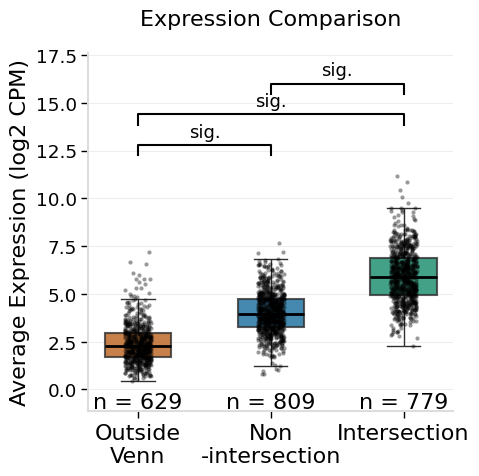

Wilcoxon rank-sum test results:
------------------------------------------------------------
Outside Venn vs Non-intersect:
Statistic: -23.8597
P-value: 8.0229e-126
------------------------------------------------------------
Outside Venn vs Intersect:
Statistic: -30.8820
P-value: 2.0864e-209
------------------------------------------------------------
Non-intersect vs Intersect:
Statistic: -25.2545
P-value: 1.0119e-140
------------------------------------------------------------
Number of genes outside Venn: 629
Number of genes in non-intersect: 809
Number of genes in intersect: 779


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Create a dataframe for plotting
plot_data = pd.DataFrame({
    'Group': ['Outside\nVenn'] * len(grouping_lineage_markers_outside_venn_plot ) +
             ['Non\n-intersection'] * len(grouping_lineage_markers_df_non_intersect_plot ) +
             ['Intersection'] * len(grouping_lineage_markers_df_intersect_plot ),
    'Average Expression': list(grouping_lineage_markers_outside_venn_plot ) +
                         list(grouping_lineage_markers_df_non_intersect_plot ) +
                         list(grouping_lineage_markers_df_intersect_plot )
})

# Set up a clean style with Arial font
plt.rcParams.update({
    'axes.grid': True,
    'grid.color': '#EEEEEE',
    'grid.linestyle': '-',
    'grid.linewidth': 0.5,
    'axes.edgecolor': '#DDDDDD',
    'axes.facecolor': 'white',
    'font.family': 'Arial'
})
sns.set_context("paper", font_scale=1.5)

# Create figure with appropriate size
fig, ax = plt.subplots(figsize=(5, 5))

# Create the boxplot with enhanced style - without outlier dots (showfliers=False)
sns.boxplot(
    x='Group',
    y='Average Expression',
    data=plot_data,
    palette=['#D55E00', '#0072B2', '#009E73'],  # Colorblind-friendly palette
    width=0.5,
    boxprops={'alpha': 0.8, 'linewidth': 1.5},
    medianprops={'color': 'black', 'linewidth': 2},
    showfliers=False,  # Remove outlier dots from the boxplot
    ax=ax
)

# Add individual data points with jitter
sns.stripplot(
    x='Group',
    y='Average Expression',
    data=plot_data,
    color='black',
    size=3,
    alpha=0.4,
    jitter=True,
    ax=ax
)

# Perform pairwise statistical tests (Wilcoxon rank-sum test)
# Outside Venn vs Non-intersect
stat1, p_value1 = stats.ranksums(grouping_lineage_markers_outside_venn_plot,
                               grouping_lineage_markers_df_non_intersect_plot)

# Outside Venn vs Intersect
stat2, p_value2 = stats.ranksums(grouping_lineage_markers_outside_venn_plot,
                               grouping_lineage_markers_df_intersect_plot)

# Non-intersect vs Intersect
stat3, p_value3 = stats.ranksums(grouping_lineage_markers_df_non_intersect_plot,
                               grouping_lineage_markers_df_intersect_plot)

# Get plot dimensions
y_max = plot_data['Average Expression'].max()
y_min = plot_data['Average Expression'].min()
y_range = y_max - y_min

# Add significance bars and p-values for each comparison
# 1. Outside Venn vs Non-intersect
bar_height1 = y_max + 0.1 * y_range
ax.plot([0, 0, 1, 1], [bar_height1, bar_height1 + 0.05 * y_range,
                      bar_height1 + 0.05 * y_range, bar_height1],
        color='black', linewidth=1.5)

if p_value1 < 0.001:
    p_text1 = f"sig."
else:
    p_text1 = f"p = {p_value1:.3f}"

ax.text(0.5, bar_height1 + 0.07 * y_range, p_text1,
        ha='center', va='bottom', fontsize=13)

# 2. Outside Venn vs Intersect
bar_height2 = y_max + 0.25 * y_range
ax.plot([0, 0, 2, 2], [bar_height2, bar_height2 + 0.05 * y_range,
                      bar_height2 + 0.05 * y_range, bar_height2],
        color='black', linewidth=1.5)

if p_value2 < 0.001:
    p_text2 = f"sig."
else:
    p_text2 = f"p = {p_value2:.3f}"

ax.text(1.0, bar_height2 + 0.07 * y_range, p_text2,
        ha='center', va='bottom', fontsize=13)

# 3. Non-intersect vs Intersect
bar_height3 = y_max + 0.4 * y_range
ax.plot([1, 1, 2, 2], [bar_height3, bar_height3 + 0.05 * y_range,
                      bar_height3 + 0.05 * y_range, bar_height3],
        color='black', linewidth=1.5)

if p_value3 < 0.001:
    p_text3 = f"sig."
else:
    p_text3 = f"p = {p_value3:.3f}"

ax.text(1.5, bar_height3 + 0.07 * y_range, p_text3,
        ha='center', va='bottom', fontsize=13)

# Set labels and title with clean styling
ax.set_xlabel('')  # Nature style often omits redundant labels
ax.set_ylabel('Average Expression (log2 CPM)', fontsize=16)
ax.set_title('Expression Comparison', fontsize=16, pad=20)

# Customize the appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Adjust axis limits to give padding for the significance bars
y_pad = 0.15 * y_range
ax.set_ylim(y_min - y_pad, y_max + 0.6 * y_range)

# Add number of samples per group at the bottom
for i, (group, count) in enumerate([
    ('Outside\nVenn', len(grouping_lineage_markers_outside_venn)),
    ('Non\n-intersect', len(grouping_lineage_markers_df_non_intersect)),
    ('Intersect', len(grouping_lineage_markers_df_intersect))
]):
    ax.text(i, y_min - y_pad * 0.7, f"n = {count}", ha='center', va='center', fontsize=16)

#make x ticks fontisize 16
ax.tick_params(axis='x', labelsize=16)

# Tight layout for better spacing
plt.tight_layout()

# Save in high resolution for publication
#save as svg and png
plt.savefig('expression_comparison_three_groups.svg', format='svg', dpi=300, bbox_inches='tight')

plt.savefig('expression_comparison_three_groups.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print the statistical results
print(f"Wilcoxon rank-sum test results:")
print("-" * 60)
print("Outside Venn vs Non-intersect:")
print(f"Statistic: {stat1:.4f}")
print(f"P-value: {p_value1:.4e}")
print("-" * 60)
print("Outside Venn vs Intersect:")
print(f"Statistic: {stat2:.4f}")
print(f"P-value: {p_value2:.4e}")
print("-" * 60)
print("Non-intersect vs Intersect:")
print(f"Statistic: {stat3:.4f}")
print(f"P-value: {p_value3:.4e}")
print("-" * 60)
print(f"Number of genes outside Venn: {len(grouping_lineage_markers_outside_venn)}")
print(f"Number of genes in non-intersect: {len(grouping_lineage_markers_df_non_intersect)}")
print(f"Number of genes in intersect: {len(grouping_lineage_markers_df_intersect)}")



In [ ]:
grouping_lineage_markers_df["gene"]

,gene
0,Cdh26
1,Trpv4
2,Cpxm2
3,Gm28380
4,Alox12e
...,...
2212,Trmt9b
2213,Ildr2
2214,Ano10
2215,Pwwp2b


In [ ]:
#take outside venn genes

outside_venn = grouping_lineage_markers_df[~(grouping_lineage_markers_df["gene"].isin(grouping_lineage_markers_df_intersect["gene"].values)) & ~(grouping_lineage_markers_df["gene"].isin(grouping_lineage_markers_df_non_intersect["gene"].values))]
#sort geom_mean_adj_pval
outside_venn = outside_venn.sort_values(by="geom_mean_adj_pval")
outside_venn.head(50)

,gene,direction,log2fc,pvalue,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,AveExpr
56,Lhfpl7,up,4.357241,8.610217e-104,4.611859,1.879707e-116,0.235716,grouping_1,0,5.181284
98,Unc93a,up,3.834686,7.185907e-95,3.953300,3.840173e-103,-0.825654,grouping_1,0,3.678846
31,ENSMUSG00000109371.2,up,5.054476,2.068038e-111,4.759200,1.049821e-102,0.164760,grouping_1,0,5.310348
47,Gm26725,up,4.232279,4.020812e-106,4.013793,2.148272e-101,-0.319870,grouping_1,0,3.926425
99,Atp12a,up,3.925693,8.838944e-95,3.776313,2.781675e-91,-0.899848,grouping_1,0,3.456647
153,ENSMUSG00000113029.3,up,4.513989,2.115097e-85,4.504139,2.745950e-87,0.376239,grouping_1,0,4.971569
209,Nherf1,up,4.558059,2.071689e-77,4.680457,3.373154e-84,2.165593,grouping_1,0,5.987424
227,Gm43091,up,3.513344,2.721909e-74,3.692348,1.444571e-83,-0.660711,grouping_1,0,3.661526
146,Gm16499,up,4.212220,2.517522e-86,4.038885,6.335898e-82,0.015953,grouping_1,0,4.598495
214,ENSMUSG00000108255.2,up,3.476495,2.977669e-76,3.526689,3.194986e-81,-0.905113,grouping_1,0,3.300988


In [ ]:
grouping_lineage_markers_df_intersect.head(50)

,gene,direction,log2fc,pvalue,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,AveExpr
0,Cdh26,up,5.792684,8.099647e-140,5.692443,5.215685e-138,0.793909,grouping_1,0,6.661444
2,Cpxm2,up,6.127143,9.084539e-135,5.856765,1.377529e-127,1.719331,grouping_1,0,7.512087
4,Alox12e,up,5.770923,1.154978e-128,5.774790,6.109327e-131,0.224201,grouping_1,0,6.357567
5,Folr1,up,6.072444,1.898428e-128,5.574420,2.063839e-113,2.667698,grouping_1,0,7.926021
6,Aldh1a2,up,6.636543,8.415210e-127,5.946328,1.059406e-107,2.939199,grouping_1,0,8.250117
7,Hey2,up,5.773938,2.155470e-126,5.624932,2.643237e-123,1.104649,grouping_1,1,6.477196
8,Agr3,up,5.654911,8.294173e-126,5.675829,2.014885e-128,1.491016,grouping_1,0,6.996314
9,Gm32592,up,5.192618,1.991562e-125,5.009594,2.583671e-120,0.164985,grouping_1,0,5.465481
10,Niban1,up,6.220707,4.842394e-125,5.778815,1.415650e-113,3.005464,grouping_1,0,7.825975
11,Nid2,up,5.631076,8.003610e-125,4.978570,5.338312e-104,2.259332,grouping_1,0,6.551783


#Repeat for other comparisons

In [ ]:
groupings

{'grouping_1': [['Stem_cells'],
  ['Melanotrophs',
   'Corticotrophs',
   'Somatotrophs',
   'Lactotrophs',
   'Thyrotrophs',
   'Gonadotrophs']],
 'grouping_2': [['Gonadotrophs'],
  ['Melanotrophs',
   'Corticotrophs',
   'Somatotrophs',
   'Lactotrophs',
   'Thyrotrophs',
   'Stem_cells']],
 'grouping_3': [['Melanotrophs', 'Corticotrophs'],
  ['Somatotrophs',
   'Lactotrophs',
   'Thyrotrophs',
   'Gonadotrophs',
   'Stem_cells']],
 'grouping_4': [['Melanotrophs'], ['Corticotrophs']],
 'grouping_5': [['Somatotrophs', 'Lactotrophs', 'Thyrotrophs'],
  ['Gonadotrophs', 'Stem_cells', 'Melanotrophs', 'Corticotrophs']],
 'grouping_6': [['Lactotrophs'], ['Somatotrophs', 'Thyrotrophs']],
 'grouping_7': [['Somatotrophs'], ['Lactotrophs', 'Thyrotrophs']],
 'grouping_8': [['Thyrotrophs'], ['Lactotrophs', 'Somatotrophs']]}

In [ ]:
import scanpy as sc
adata1 = sc.read(f"/content/drive/MyDrive/pituitary_atlas/processed/nac/{sra_ids[0]}/analysis/adata_new_assigned.h5ad")
adata2 = sc.read(f"/content/drive/MyDrive/pituitary_atlas/processed/nac/{sra_ids[1]}/analysis/adata_new_assigned.h5ad")
adata3 = sc.read(f"/content/drive/MyDrive/pituitary_atlas/processed/nac/{sra_ids[2]}/analysis/adata_new_assigned.h5ad")

/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


In [ ]:
#remove all cells that are either Erythrocytes, Mesenchymal cells, Pituicytes, Immune_cells or Endothelial_cells
adata1 = adata1[~adata1.obs["new_cell_type"].isin(["Erythrocytes", "Mesenchymal_cells", "Pituicytes", "Immune_cells", "Endothelial_cells"])]
adata2 = adata2[~adata2.obs["new_cell_type"].isin(["Erythrocytes", "Mesenchymal_cells", "Pituicytes", "Immune_cells", "Endothelial_cells"])]
adata3 = adata3[~adata3.obs["new_cell_type"].isin(["Erythrocytes", "Mesenchymal_cells", "Pituicytes", "Immune_cells", "Endothelial_cells"])]

In [ ]:
#load /content/grouping_lineage_markers.csv
dfs_for_export = []
results_df= pd.DataFrame(columns=["grouping","up_in_3_datasets","down_in_3_datasets","up_in_at_least1_dataset","down_in_at_least1_dataset","up_in_0_datasets","down_in_0_datasets"])
for grouping in ["grouping_1","grouping_2","grouping_3","grouping_4","grouping_5","grouping_6","grouping_7","grouping_8"]:
  adata1_marker_genes = find_marker_genes(adata1, sra_ids[0], group1=groupings[grouping][0],group2=groupings[grouping][1])
  adata2_marker_genes = find_marker_genes(adata2, sra_ids[1], group1=groupings[grouping][0],group2=groupings[grouping][1])
  adata3_marker_genes = find_marker_genes(adata3, sra_ids[2], group1=groupings[grouping][0],group2=groupings[grouping][1])

  #keep only group1 in  cell_type column
  adata1_marker_genes = adata1_marker_genes[adata1_marker_genes["cell_type"]=="group1"]
  adata2_marker_genes = adata2_marker_genes[adata2_marker_genes["cell_type"]=="group1"]
  adata3_marker_genes = adata3_marker_genes[adata3_marker_genes["cell_type"]=="group1"]

  adata1_up_genes = adata1_marker_genes[(adata1_marker_genes["direction"]=="pos") & (adata1_marker_genes["sig"]<0.05)]["gene"].values
  adata2_up_genes = adata2_marker_genes[(adata2_marker_genes["direction"]=="pos") & (adata2_marker_genes["sig"]<0.05)]["gene"].values
  adata3_up_genes = adata3_marker_genes[(adata3_marker_genes["direction"]=="pos") & (adata3_marker_genes["sig"]<0.05)]["gene"].values

  adata1_down_genes = adata1_marker_genes[(adata1_marker_genes["direction"]=="neg") & (adata1_marker_genes["sig"]<0.05)]["gene"].values
  adata2_down_genes = adata2_marker_genes[(adata2_marker_genes["direction"]=="neg") & (adata2_marker_genes["sig"]<0.05)]["gene"].values
  adata3_down_genes = adata3_marker_genes[(adata3_marker_genes["direction"]=="neg") & (adata3_marker_genes["sig"]<0.05)]["gene"].values

  #concat
  marker_genes = pd.concat([adata1_marker_genes, adata2_marker_genes, adata3_marker_genes])


  grouping_lineage_markers_df = pd.read_csv("/content/drive/MyDrive/pituitary_atlas/Unstructured/grouping_lineage_markers.csv") #keep where grouping is grouping_1 and direction is up

  grouping_lineage_markers_up_genes = grouping_lineage_markers_df[(grouping_lineage_markers_df["grouping"] == grouping) & (grouping_lineage_markers_df["direction"] == "up")]["gene"].values
  grouping_lineage_markers_down_genes = grouping_lineage_markers_df[(grouping_lineage_markers_df["grouping"] == grouping) & (grouping_lineage_markers_df["direction"] == "down")]["gene"].values

  up_in_3_datasets = list(set(adata1_up_genes) & set(adata2_up_genes) & set(adata3_up_genes) & set(grouping_lineage_markers_up_genes))
  down_in_3_datasets = list(set(adata1_down_genes) & set(adata2_down_genes) & set(adata3_down_genes) & set(grouping_lineage_markers_down_genes))

  up_in_at_least1_dataset = set(list(set(adata1_up_genes) | set(adata2_up_genes) | set(adata3_up_genes))) & set(grouping_lineage_markers_up_genes)

  down_in_at_least1_dataset = set(list(set(adata1_down_genes) | set(adata2_down_genes) | set(adata3_down_genes))) & set(grouping_lineage_markers_down_genes)

  #remove those from this that are in all 3
  up_in_at_least1_dataset = list(set(up_in_at_least1_dataset) - set(up_in_3_datasets))
  down_in_at_least1_dataset = list(set(down_in_at_least1_dataset) - set(down_in_3_datasets))


  up_in_0_datasets = list(set(grouping_lineage_markers_up_genes) - set(adata1_up_genes) - set(adata2_up_genes) - set(adata3_up_genes))
  down_in_0_datasets = list(set(grouping_lineage_markers_down_genes) - set(adata1_down_genes) - set(adata2_down_genes) - set(adata3_down_genes))

  #save these in df for export
  df_for_export_up = pd.DataFrame({"grouping": [grouping for _ in range(len(up_in_0_datasets))],
                                "low_expression_markers": up_in_0_datasets})
  df_for_export_down = pd.DataFrame({"grouping": [grouping for _ in range(len(down_in_0_datasets))],
                                "low_expression_markers": down_in_0_datasets})

  df_for_export = pd.concat([df_for_export_up, df_for_export_down])

  dfs_for_export.append(df_for_export)

  results_df_subset = pd.DataFrame(
      {"grouping":grouping,"up_in_3_datasets":len(up_in_3_datasets),"down_in_3_datasets":len(down_in_3_datasets),"up_in_at_least1_dataset":len(up_in_at_least1_dataset),"down_in_at_least1_dataset":len(down_in_at_least1_dataset),"up_in_0_datasets":len(up_in_0_datasets),"down_in_0_datasets":len(down_in_0_datasets)}, index=[0])
  print(results_df_subset)
  results_df = pd.concat([results_df, results_df_subset])

df_export = pd.concat(dfs_for_export)
df_export.to_csv("/content/drive/MyDrive/pituitary_atlas/Unstructured/low_exp_markers.csv")



     grouping  up_in_3_datasets  down_in_3_datasets  up_in_at_least1_dataset  \
0  grouping_1               779                 225                      809   

   down_in_at_least1_dataset  up_in_0_datasets  down_in_0_datasets  
0                        837               629                 542  
     grouping  up_in_3_datasets  down_in_3_datasets  up_in_at_least1_dataset  \
0  grouping_2               165                  19                      264   

   down_in_at_least1_dataset  up_in_0_datasets  down_in_0_datasets  
0                         61               204                 183  
     grouping  up_in_3_datasets  down_in_3_datasets  up_in_at_least1_dataset  \
0  grouping_3                89                  27                       74   

   down_in_at_least1_dataset  up_in_0_datasets  down_in_0_datasets  
0                         26               103                   8  
     grouping  up_in_3_datasets  down_in_3_datasets  up_in_at_least1_dataset  \
0  grouping_4          

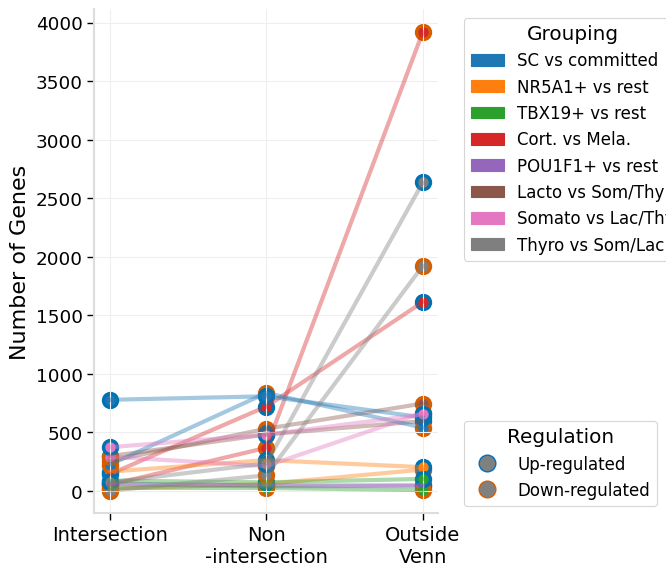

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

#rename groupings to

rename_dict = {
    'grouping_1': 'SC vs committed',
    'grouping_2': 'NR5A1+ vs rest',
    'grouping_3': 'TBX19+ vs rest',
    'grouping_4': 'Cort. vs Mela.',
    'grouping_5': 'POU1F1+ vs rest',
    'grouping_6': 'Lacto vs Som/Thy',
    'grouping_7': 'Somato vs Lac/Thy',
    'grouping_8': 'Thyro vs Som/Lac'
}
results_df['grouping'] = results_df['grouping'].map(rename_dict)


# Create a long-form dataframe for the stripplot
melted_data = []

# For each row, create entries for each dataset category and track direction
for idx, row in results_df.iterrows():
    # Add up-regulated data points
    melted_data.append({
        'grouping': row['grouping'],
        'dataset_category': 'in_3_datasets',
        'value': row['up_in_3_datasets'],
        'direction': 'up',
        'group_id': f"{row['grouping']}_up"
    })

    melted_data.append({
        'grouping': row['grouping'],
        'dataset_category': 'in_at_least1_dataset',
        'value': row['up_in_at_least1_dataset'],
        'direction': 'up',
        'group_id': f"{row['grouping']}_up"
    })

    melted_data.append({
        'grouping': row['grouping'],
        'dataset_category': 'in_0_datasets',
        'value': row['up_in_0_datasets'],
        'direction': 'up',
        'group_id': f"{row['grouping']}_up"
    })

    # Add down-regulated data points
    melted_data.append({
        'grouping': row['grouping'],
        'dataset_category': 'in_3_datasets',
        'value': row['down_in_3_datasets'],
        'direction': 'down',
        'group_id': f"{row['grouping']}_down"
    })

    melted_data.append({
        'grouping': row['grouping'],
        'dataset_category': 'in_at_least1_dataset',
        'value': row['down_in_at_least1_dataset'],
        'direction': 'down',
        'group_id': f"{row['grouping']}_down"
    })

    melted_data.append({
        'grouping': row['grouping'],
        'dataset_category': 'in_0_datasets',
        'value': row['down_in_0_datasets'],
        'direction': 'down',
        'group_id': f"{row['grouping']}_down"
    })

# Convert to DataFrame
plot_data = pd.DataFrame(melted_data)

# Set up a clean style with Arial font (Nature style)
plt.rcParams.update({
    'axes.grid': True,
    'grid.color': '#EEEEEE',
    'grid.linestyle': '-',
    'grid.linewidth': 0.5,
    'axes.edgecolor': '#DDDDDD',
    'axes.facecolor': 'white',
    'font.family': 'Arial'
})
sns.set_context("paper", font_scale=1.5)

# Create figure with appropriate size
fig, ax = plt.subplots(figsize=(6, 6))

# Create a categorical column for x-axis ordering
category_order = ['in_3_datasets', 'in_at_least1_dataset', 'in_0_datasets']
x_positions = {cat: i for i, cat in enumerate(category_order)}

# Define a colormap for the groupings
unique_groups = plot_data['grouping'].unique()
n_groups = len(unique_groups)
#set categorical colormap
colors = sns.color_palette("tab10", n_groups)
group_color_map = {group: colors[i] for i, group in enumerate(unique_groups)}

# Define direction colors (blue for up, red for down)
direction_color_map = {'up': '#0072B2', 'down': '#D55E00'}

# We'll manually plot the points and lines
for group_id, group_data in plot_data.groupby('group_id'):
    # Extract grouping and direction
    grouping = group_data['grouping'].iloc[0]
    direction = group_data['direction'].iloc[0]

    # Sort by category order
    sorted_data = group_data.sort_values(by='dataset_category',
                                         key=lambda x: x.map({cat: i for i, cat in enumerate(category_order)}))

    # Get coordinates for plotting
    x_coords = [x_positions[cat] for cat in sorted_data['dataset_category']]
    y_coords = sorted_data['value'].values

    # Get fill color from grouping
    fill_color = group_color_map[grouping]

    # Get edge color from direction
    edge_color = direction_color_map[direction]

    # Draw the line with appropriate color and lower alpha
    ax.plot(x_coords, y_coords, color=fill_color, alpha=0.4, linewidth=3)

    # Plot points with fill color based on grouping and edge color based on direction
    for x, y in zip(x_coords, y_coords):
        ax.scatter(x, y, s=100, color=fill_color, edgecolor=edge_color, linewidth=2.5)

# Customize the appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Set labels and title with clean styling
ax.set_xlabel('', fontsize=0)
ax.set_ylabel('Number of Genes', fontsize=16)
ax.set_title('', fontsize=0, pad=20)

# Set x-ticks and labels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Intersection', 'Non\n-intersection', 'Outside\nVenn'], fontsize=14)

# Create legend for groupings
grouping_handles = [mpatches.Patch(color=group_color_map[group], label=group) for group in unique_groups]
first_legend = ax.legend(handles=grouping_handles, title='Grouping', fontsize=12,
                         loc='upper left', bbox_to_anchor=(1.05, 1), frameon=True)
ax.add_artist(first_legend)

# Create legend for directions
direction_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
               markeredgecolor=direction_color_map['up'], markersize=12, label='Up-regulated'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
               markeredgecolor=direction_color_map['down'], markersize=12, label='Down-regulated')
]
ax.legend(handles=direction_handles, title='Regulation', fontsize=12,
          loc='upper left', bbox_to_anchor=(1.05, 0.2), frameon=True)

# Adjust layout to make room for legends
plt.tight_layout()
plt.subplots_adjust(right=0.75)

# Save in high resolution for publication
plt.savefig('gene_regulation_connected_stripplot_no_jitter.svg', format='svg', dpi=300, bbox_inches='tight')
plt.savefig('gene_regulation_connected_stripplot_no_jitter.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
plot_data

,grouping,dataset_category,value,direction,group_id
0,SC vs committed,in_3_datasets,779,up,SC vs committed_up
1,SC vs committed,in_at_least1_dataset,809,up,SC vs committed_up
2,SC vs committed,in_0_datasets,629,up,SC vs committed_up
3,SC vs committed,in_3_datasets,225,down,SC vs committed_down
4,SC vs committed,in_at_least1_dataset,837,down,SC vs committed_down
5,SC vs committed,in_0_datasets,542,down,SC vs committed_down
6,NR5A1+ vs rest,in_3_datasets,165,up,NR5A1+ vs rest_up
7,NR5A1+ vs rest,in_at_least1_dataset,264,up,NR5A1+ vs rest_up
8,NR5A1+ vs rest,in_0_datasets,204,up,NR5A1+ vs rest_up
9,NR5A1+ vs rest,in_3_datasets,19,down,NR5A1+ vs rest_down


In [ ]:
!pip freeze

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.0
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.16.5
altair==5.5.0
anndata==0.12.2
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array-api-compat==1.12.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.10.6.0.35.25
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.0.1
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.2
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.24.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.10.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.10.5
cffi==2.0.0
chardet==5.2.0
c